In [8]:
import pandas as pd
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)  #
import matplotlib.pyplot as plt

## Market Data Analysis and Trading Strategies

### Objective
>This notebook aims to analyze market data and develop trading strategies based on technical analysis. The steps outlined below guide the analysis and strategy formulation process.

### Steps Performed in this Notebook

#### 1. Data Preprocessing
> - **1.1 Data Selection:**  
>   - The dataset contains information on over 2,000 unique stocks. For this analysis, we have filtered approximately **11 stocks** for detailed exploration.  
> - **1.2 Date Range Selection:**  
>   - The stock data is filtered for the period **June 2021 to November 2022** (16 months). Although the strategies presented here are generic and based on technical analysis principles, reducing the dataset allows for more focused analysis.

#### 2. Exploratory Data Analysis (EDA)
> - **2.1 Handling Missing Data:**  
>   - We inspect the dataset for any **null values**. If null values are found, strategies such as **imputation** or **removal of records** are proposed to ensure the quality and accuracy of the analysis.

> - **2.2 Visualizing Stock Price Trends:**  
>   - We generate **price trend graphs** for each stock to provide a visual overview of market performance. These visualizations help in identifying patterns and trends, which form the foundation for technical analysis.

#### 3. Strategies applied
> - **3.1 Bollinger Bands and RSI:**  
>   - We use bollinger bands to 

In [2]:
## First reduce the data before starting the project
stocks= pd.read_csv('stocks_df.csv')
stocks['Date'] = pd.to_datetime(stocks['Date'])
max_date = stocks['Date'].max()
median_date = stocks['Date'].median()
min_date = stocks['Date'].min()

##print(f"max date - {max_date}")
##print(f"median date - {max_date}")
##print(f"min date - {min_date}")

## lets filter out old data 
stocks = stocks[(stocks['Date'] >= '2021-06-01') & (stocks['Date'] <= '2022-01-11')]
stocks = stocks.reset_index(drop=True)
interested_Stocks = ["20MICRONS","INFY","TCS","TVSMOTOR","TECHM","BIRLAMONEY","CIPLA","DABUR","DATAMATICS","RELIANCE","IRCTC"]
stocks = stocks[stocks['Stock'].isin(interested_Stocks)]
stocks = stocks.reset_index(drop=True)



### Exploratory Data Analysis


 ****Missing Values****

Date          0
Stock         0
Open          0
High          0
Low           0
Close         0
Volume        0
Change Pct    0
dtype: int64


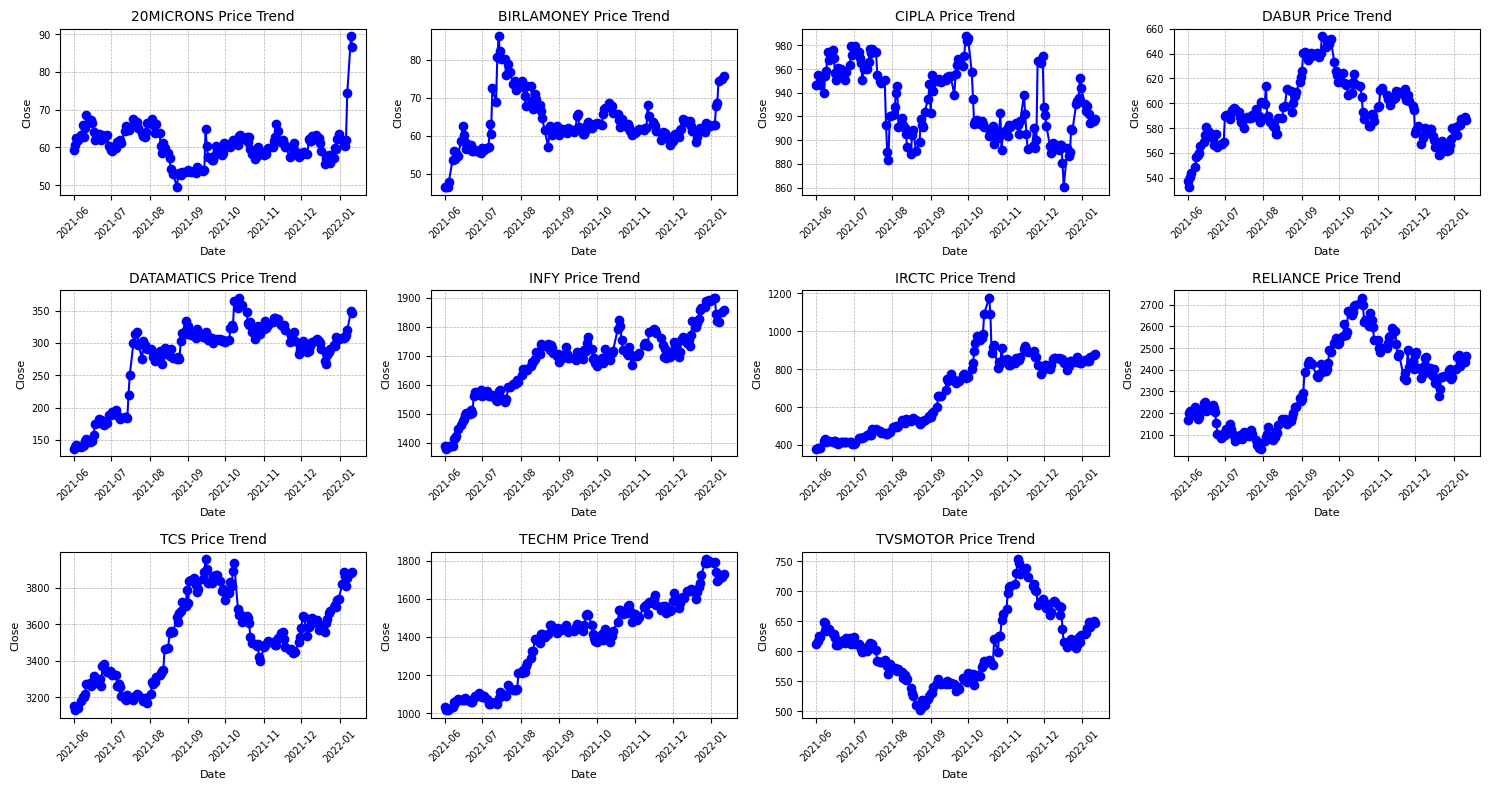

In [3]:
##Find missing values
print(f"\n ****Missing Values****\n")
print(stocks.isna().sum())

def plot_stock_trends_grid(df, rows=4, cols=4):
    unique_stocks = df['Stock'].unique()
    total_plots = len(unique_stocks)
    
    # Create a grid of subplots
    fig, axes = plt.subplots(rows, cols, figsize=(15, 10))  # Grid size and figure size
    axes = axes.flatten()  # Flatten to easily index axes

    # Plot each stock's trend
    for i, stock in enumerate(unique_stocks):
        stock_data = df[df['Stock'] == stock]
        axes[i].plot(stock_data['Date'], stock_data['Close'], marker='o', color='blue')
        axes[i].set_title(f'{stock} Price Trend', fontsize=10)
        axes[i].set_xlabel('Date', fontsize=8)
        axes[i].set_ylabel('Close', fontsize=8)
        axes[i].grid(True, linestyle='--', linewidth=0.5)
        axes[i].tick_params(axis='x', rotation=45, labelsize=7)
        axes[i].tick_params(axis='y', labelsize=7)

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    # Adjust layout
    plt.tight_layout()
    plt.show()
    

plot_stock_trends_grid(stocks, rows=4, cols=4)


In [28]:
stocks

,Date,Stock,Open,High,Low,Close,Volume,Change Pct
0,2021-06-01,20MICRONS,65.95,65.95,58.75,59.35,456527,-7.41
1,2021-06-02,20MICRONS,59.95,61.90,59.50,60.70,374552,2.27
2,2021-06-03,20MICRONS,62.25,64.35,61.10,62.55,402397,3.05
3,2021-06-04,20MICRONS,63.40,64.35,61.30,61.90,213663,-1.04
4,2021-06-07,20MICRONS,64.00,64.25,62.20,63.30,308284,2.26
...,...,...,...,...,...,...,...,...
1700,2022-01-05,TVSMOTOR,632.80,644.20,629.40,638.70,1056096,1.31
1701,2022-01-06,TVSMOTOR,635.00,650.00,630.00,648.90,1042775,1.60
1702,2022-01-07,TVSMOTOR,650.85,654.00,637.25,641.05,715951,-1.21
1703,2022-01-10,TVSMOTOR,645.00,653.00,642.50,649.80,771849,1.36


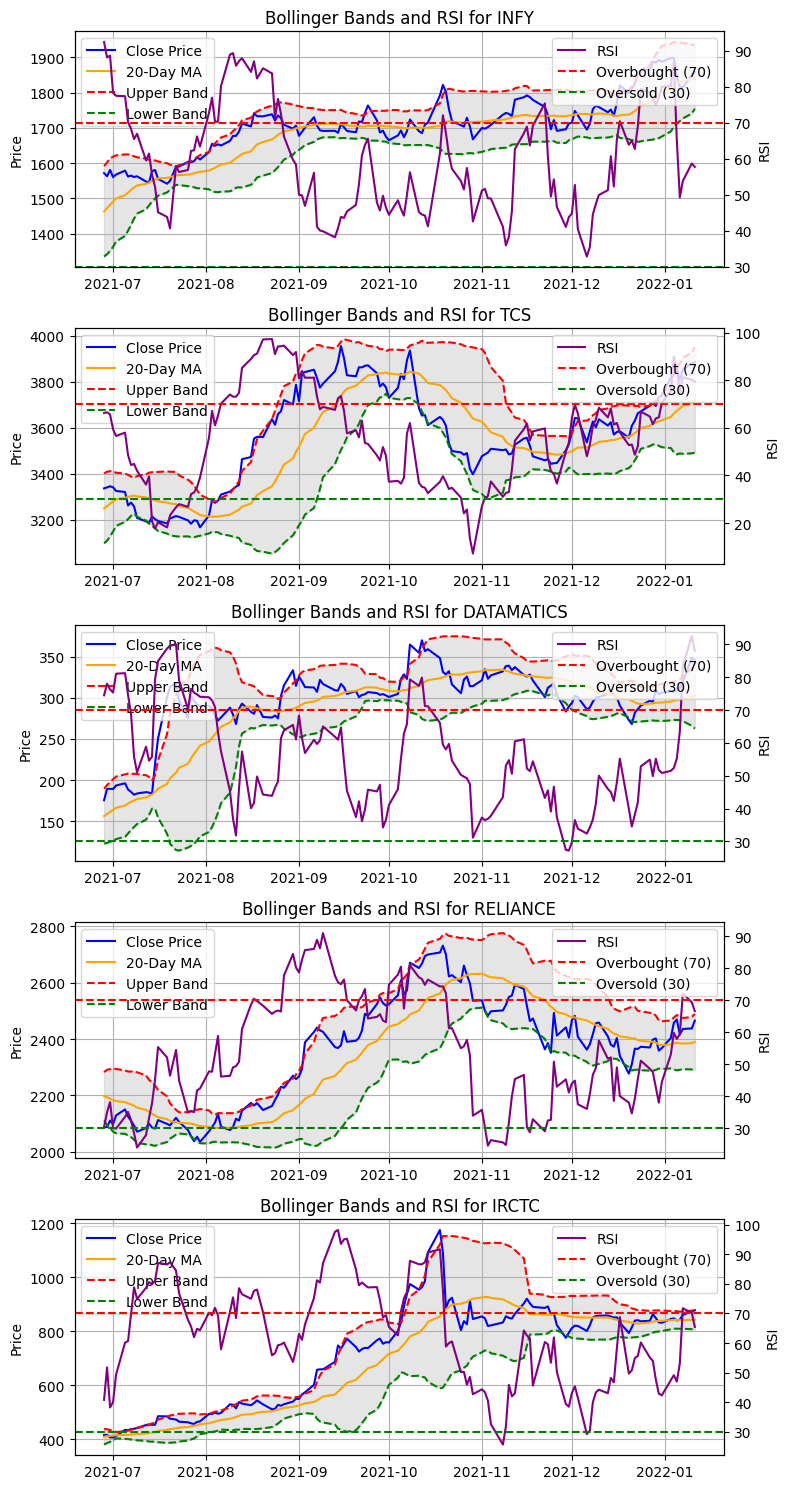

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Example: Load stock data (replace with your actual data loading process)
# stocks = pd.read_csv('path_to_your_stock_data.csv')
# Ensure 'Date' is in datetime format
stocks['Date'] = pd.to_datetime(stocks['Date'])

# Function to calculate RSI
def compute_RSI(data, window=14):
    delta = data.diff()
    gain = np.where(delta > 0, delta, 0)
    loss = np.where(delta < 0, -delta, 0)
    
    avg_gain = pd.Series(gain).rolling(window=window).mean()
    avg_loss = pd.Series(loss).rolling(window=window).mean()
    
    RS = avg_gain / avg_loss
    RSI = 100 - (100 / (1 + RS))
    RSI.name = 'RSI'  # Set the name for proper column handling
    return RSI

# Function to calculate Bollinger Bands
def compute_bollinger_bands(data, window=20):
    MA = data.rolling(window=window).mean()
    std_dev = data.rolling(window=window).std()
    upper_band = MA + 2 * std_dev
    lower_band = MA - 2 * std_dev
    MA.name = '20-Day MA'  # Set the name for proper column handling
    upper_band.name = 'Upper Band'
    lower_band.name = 'Lower Band'
    return MA, upper_band, lower_band

# List of stock tickers
tickers = ["INFY", "TCS", "DATAMATICS", "RELIANCE", "IRCTC"]

# Number of rows based on number of tickers
n_rows = len(tickers)

# Create subplots dynamically
fig, axes = plt.subplots(n_rows, 1, figsize=(8, 3 * n_rows))

# If only 1 row, ensure axes is treated as a list
if n_rows == 1:
    axes = [axes]

for idx, stock in enumerate(tickers):
    # Filter data for the current stock
    stock_data = stocks[stocks['Stock'] == stock]

    # Compute Bollinger Bands
    MA, upper_band, lower_band = compute_bollinger_bands(stock_data['Close'])
    
    # Compute RSI
    rsi = compute_RSI(stock_data['Close'])

    # Drop NaN values to align dimensions
    data = pd.concat([
    stock_data['Date'].reset_index(drop=True),
    stock_data['Close'].reset_index(drop=True),
    MA.reset_index(drop=True),
    upper_band.reset_index(drop=True),
    lower_band.reset_index(drop=True),
    rsi.reset_index(drop=True)
    ], axis=1)

    # Drop rows with NaN values (important for rolling windows)
    data = data.dropna(subset=['RSI', '20-Day MA', 'Upper Band', 'Lower Band'])
    
    # If no valid data remains after dropna, skip this stock
    if data.empty:
        print(f"No valid data available for {stock}. Skipping this stock.")
        continue

    # Primary axis for Bollinger Bands and Close Price
    ax1 = axes[idx]
    ax1.plot(data['Date'], data['Close'], label='Close Price', color='blue')
    ax1.plot(data['Date'], data[MA.name], label='20-Day MA', color='orange')
    ax1.plot(data['Date'], data[upper_band.name], linestyle='--', color='red', label='Upper Band')
    ax1.plot(data['Date'], data[lower_band.name], linestyle='--', color='green', label='Lower Band')
    ax1.fill_between(data['Date'], data[upper_band.name], data[lower_band.name], color='gray', alpha=0.2)  # Fill between bands
    ax1.set_ylabel('Price')
    ax1.legend(loc='upper left')
    ax1.grid(True)

    # Secondary axis for RSI
    ax2 = ax1.twinx()
    ax2.plot(data['Date'], data[rsi.name], label='RSI', color='purple')
    ax2.axhline(70, color='red', linestyle='--', label='Overbought (70)')
    ax2.axhline(30, color='green', linestyle='--', label='Oversold (30)')
    ax2.set_ylabel('RSI')
    ax2.legend(loc='upper right')

    # Title for each subplot
    ax1.set_title(f'Bollinger Bands and RSI for {stock}')

plt.tight_layout()
plt.show()


In [96]:
# Filter data for the current stock
stock_data = stocks[stocks['Stock'] == stock]
# Compute RSI
rsi = compute_RSI(stock_data['Close'])
MA, upper_band, lower_band = compute_bollinger_bands(stock_data['Close'])

In [118]:
data = pd.concat([
    stock_data['Date'].reset_index(drop=True),
    stock_data['Close'].reset_index(drop=True),
    MA.reset_index(drop=True),
    upper_band.reset_index(drop=True),
    lower_band.reset_index(drop=True),
    rsi.reset_index(drop=True)
], axis=1)

data = data.dropna() 
data

,Date,Close,20-Day MA,Upper Band,Lower Band,RSI
19,2021-06-28,415.55,409.3905,438.506431,380.274569,40.805700
20,2021-06-29,416.37,411.2630,436.714253,385.811747,51.802946
21,2021-06-30,406.77,412.4220,434.447900,390.396100,38.238157
22,2021-07-01,406.96,413.5520,431.447815,395.656185,40.060698
23,2021-07-02,412.11,414.9405,426.470011,403.410989,49.342891
...,...,...,...,...,...,...
150,2022-01-05,840.60,842.1175,874.666674,809.568326,46.980392
151,2022-01-06,843.25,841.4375,873.250670,809.624330,53.115131
152,2022-01-07,860.95,841.5875,873.754807,809.420193,71.768154
153,2022-01-10,873.45,842.3250,876.741940,807.908060,70.185695


In [117]:
data = pd.concat([stock_data['Date'], stock_data['Close'], MA, upper_band, lower_band, rsi], axis=1)
data['Close'].isna().sum()

np.int64(155)